In [66]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [60]:
def data_set(key, dict):
    data = []
    for item in key:
        data.append(dict[item])
    return np.array(data)

def get_keys_and_data(fileName):
    dict = np.load(fileName, allow_pickle=True).item()
    dict_keys = dict.keys()
    data_values = data_set(dict_keys, dict)
    return  list(dict_keys), data_values


def pca_experiment(dataset):
    explained_varience = [0.90, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]
    n_princple_components = []

    for i in explained_varience:
        pca = PCA(n_components= i )
        principalComponents = pca.fit_transform(dataset)
        n_princple_components.append(pca.n_components_)
    
    plt.plot(explained_varience, n_princple_components, marker ="o")
    for i in range(len(explained_varience)):
        plt.text(explained_varience[i], n_princple_components[i], f'({explained_varience[i]}, {n_princple_components[i]})', fontsize=6, ha='right')

    plt.title("PCA experiemnt")
    plt.xlabel("explained_varience")
    plt.ylabel("n_princple_components")
    plt.show()

In [61]:
def pca_filesave(key, dataset, filename):
    d = {}
    pca = PCA(n_components= 0.99)
    principalComponents = pca.fit_transform(dataset)
    for i in range(len(key)):
        d[key[i]] = principalComponents[i]
    #print(d)
    np.save(f"{filename}.npy", d)
    print(f"{filename} saved")

In [62]:
# making test and train into one set, because I am tired 
def makeOne(train, test, name):
    dict_train = np.load(train, allow_pickle=True).item()
    dict_test = np.load(test, allow_pickle=True).item()
    di = dict_train | dict_test
    print(len(di))
    np.save(name, di)

if False:
    makeOne('GLCM_train.npy', 'GLCM_test.npy', "glcm.npy")
    makeOne('GLCM_trainN.npy', 'GLCM_testN.npy', "glcm_n.npy")

    makeOne('hog_trainN.npy', 'hog_testN.npy', "hog_n.npy")
    makeOne('hog_train.npy', 'hog_test.npy', "hog.npy")

    makeOne('lbp_train.npy', 'lbp_test.npy', "lbp.npy")

    makeOne('hist_train.npy', 'hist_test.npy', "hist.npy")
    makeOne('hist_trainN.npy', 'hist_testN.npy', "hist_n.npy")

In [63]:
# 2669 trees  
glcm_keys_test_n , glcm_data_test_n  =  get_keys_and_data('GLCM_testN.npy')
glcm_keys_test , glcm_data_test  =  get_keys_and_data('GLCM_test.npy')

hist_keys_n_test, hist_data_n_test =  get_keys_and_data('hist_testN.npy')
hist_keys_test, hist_data_test =  get_keys_and_data('hist_test.npy')

hog_keys_n_test, hog_data_n_test =  get_keys_and_data('hog_testN.npy')
hog_keys_test, hog_data_test =  get_keys_and_data('hog_test.npy')

lbp_keys_test, lbp_data_test =  get_keys_and_data('lbp_test.npy')

In [ ]:
glcm_keys_n , glcm_data_n  =  get_keys_and_data('GLCM_n.npy')
glcm_keys , glcm_data  =  get_keys_and_data('GLCM.npy')

hist_keys_n, hist_data_n =  get_keys_and_data('hist_n.npy')
hist_keys, hist_data =  get_keys_and_data('hist.npy')

hog_keys_n, hog_data_n =  get_keys_and_data('hog_n.npy')
hog_keys, hog_data =  get_keys_and_data('hog.npy')
 # high deminesnion, hypothesise that feature vecotr is not gaussian, there is too much correlation , (bad , but can T-sne use non-linear projection)
# addtional _ autoemcoder -> machine learning, learn to project 

lbp_keys_n, lbp_data_n =  get_keys_and_data('lbp_n.npy')
lbp_keys, lbp_data =  get_keys_and_data('lbp.npy')

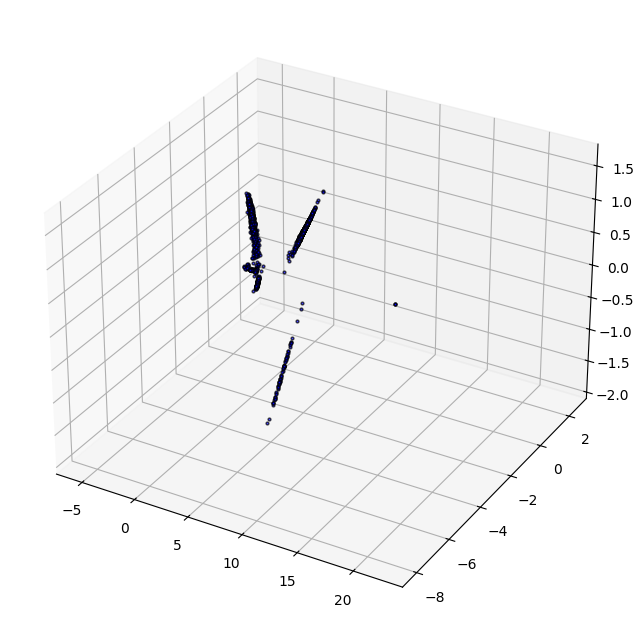

glcm_data_test_n


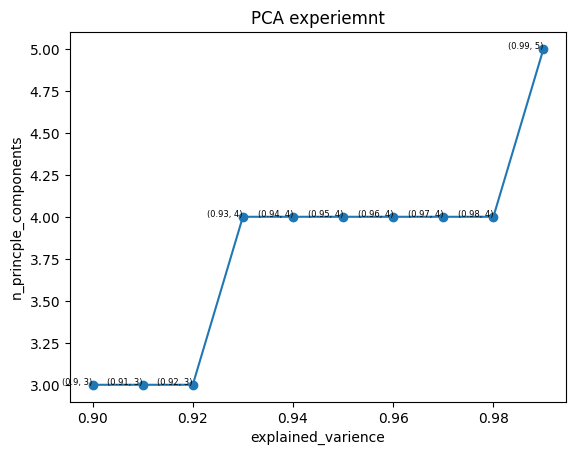

glcm_data_test


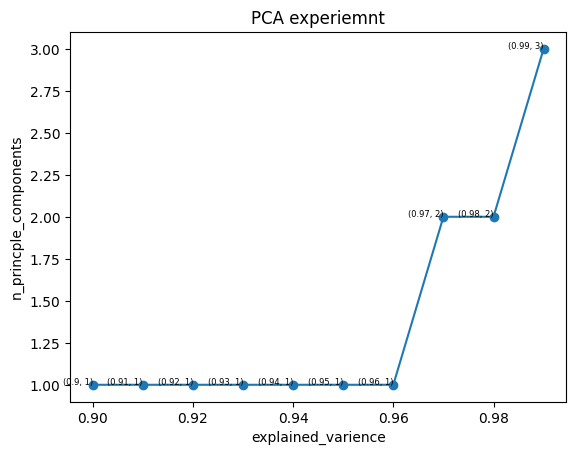

hist_data_n_test


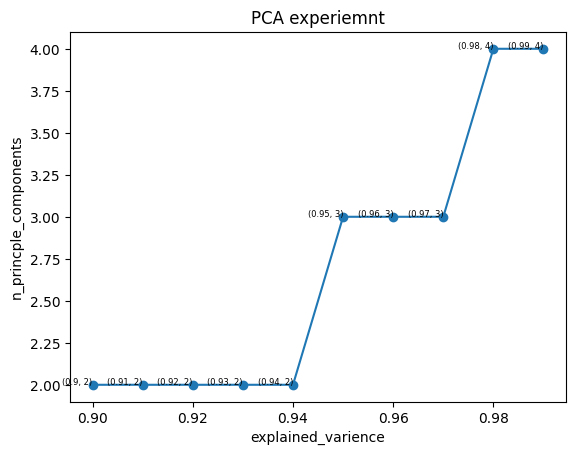

hist_data_test


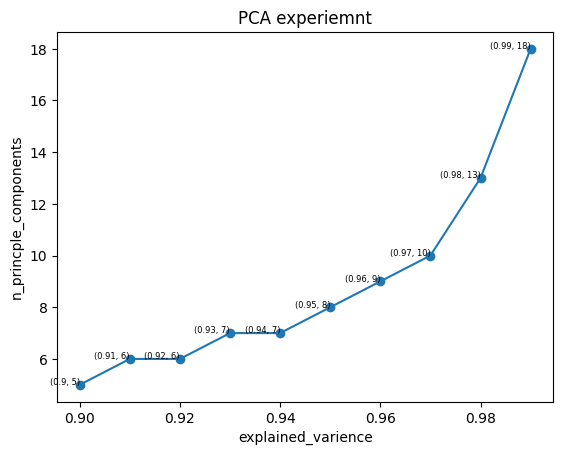

hog_data_test


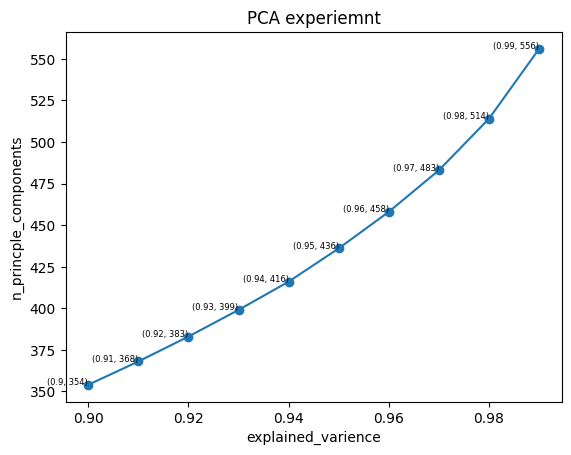

hog_data_n_test


KeyboardInterrupt: 

In [65]:
print("glcm_data_test_n")
pca_experiment(glcm_data_test_n)
print("glcm_data_test")
pca_experiment(glcm_data_test)

print("hist_data_n_test")
pca_experiment(hist_data_n_test)
print("hist_data_test")
pca_experiment(hist_data_test)

print("hog_data_test")
pca_experiment(hog_data_test)
print("hog_data_n_test")
pca_experiment(hog_data_n_test)

print("lbp_data_test")
pca_experiment(lbp_data_test)


lbp_data_test


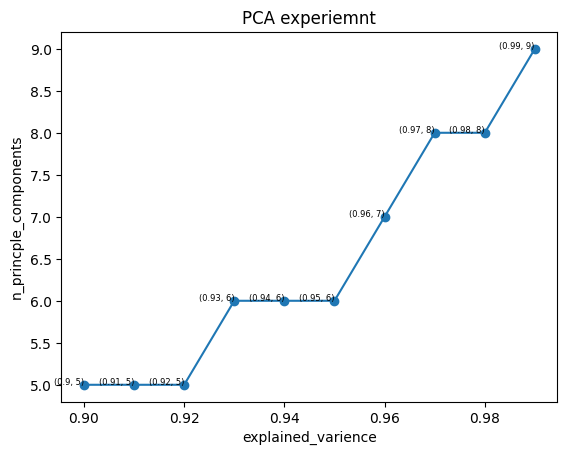

In [ ]:
lbp_keys_test_n, lbp_data_test_n =  get_keys_and_data('lbp_test_n.npy')
print("lbp_data_test")
pca_experiment(lbp_data_test)


In [ ]:
# # the test set is smaller, so later on it will be used to find parameter for DBSCAN
# pca_filesave(hog_keys_n_test, hog_data_n_test, "hog_n_pca_test")
# pca_filesave(hog_keys_test, hog_data_test, "hog_pca_test")

# pca_filesave(glcm_keys_test_n, glcm_data_test_n, "glcm_n_pca_test")
# pca_filesave(glcm_keys_test, glcm_data_test, "glcm_pca_test")

# pca_filesave(lbp_keys_test, lbp_data_test, "lbp_pca_test")
# pca_filesave(lbp_keys_test_n, lbp_data_test_n, "lbp_n_pca_test")

# pca_filesave(hist_keys_n_test, hist_data_n_test, "hist_n_pca_test")
# pca_filesave(hist_keys_test, hist_data_test, "hist_pca_test")

hog_n_pca_test saved
hog_pca_test saved
glcm_n_pca_test saved
glcm_pca_test saved
lbp_pca_test saved
lbp_n_pca_test saved
hist_n_pca_test saved
hist_pca_test saved


hist_data_n_test


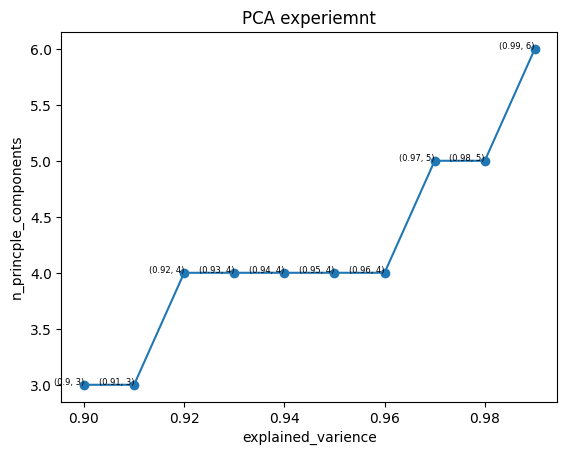

In [102]:
print("hist_data_n_test")
pca_experiment(hist_data_n)

(13067, 32)


In [36]:
# pca_filesave(glcm_keys_n, glcm_data_n, "glcm_n_pca")
# pca_filesave(glcm_keys, glcm_data, "glcm_pca")

# pca_filesave(hog_keys_n, hog_data_n, "hog_n_pca")
# pca_filesave(hog_keys, hog_data, "hog_pca")

pca_filesave(lbp_keys_n, lbp_data_n, "lbp_n_pca")
pca_filesave(lbp_keys, lbp_data, "lbp_pca")

# pca_filesave(hist_keys_n, hist_data_n, "hist_n_pca")
# pca_filesave(hist_keys, hist_data, "hist_pca")

lbp_n_pca saved


In [78]:
def ground_truth_set(key):
    ground_truth = []
    for item in key:
        if "Palm" in item: 
            ground_truth.append(1)
        else:
            ground_truth.append(0)
    
    return np.array(ground_truth)

def data_set(key, dict):
    data = []
    for item in key:
        data.append(dict[item])
    return np.array(data)

def get_truth_and_data(fileName):
    dict = np.load(fileName, allow_pickle=True).item()
    dict_keys = dict.keys()
    print(len(dict_keys))
    ground_truth = ground_truth_set(dict_keys)
    data_values = data_set(dict_keys, dict)

    return ground_truth, data_values

In [79]:
glcm_truth_n_pca, glcm_data_n_pca =  get_truth_and_data('GLCM_n_pca.npy')
glcm_truth_pca, glcm_data_pca =  get_truth_and_data('GLCM_pca.npy')

hist_truth_n_pca, hist_data_n_pca =  get_truth_and_data('hist_n_pca.npy')
hist_truth_pca, hist_data_pca =  get_truth_and_data('hist_pca.npy')

hog_truth_n_pca, hog_data_n_pca =  get_truth_and_data('hog_n_pca.npy')
hog_truth_pca, hog_data_pca =  get_truth_and_data('hog_pca.npy')

lbp_truth_n_pca, lbp_data_n_pca =  get_truth_and_data('lbp_n_pca.npy')
lbp_truth_pca, lbp_data_pca =  get_truth_and_data('lbp_pca.npy')

13067
13067
13067
13067
13067
13067
13067
13067


In [104]:
print(glcm_data.shape)
print(glcm_data_pca.shape)

print(glcm_data_n.shape)
print(glcm_data_n_pca.shape)

print(hog_data.shape)
print(hog_data_pca.shape)

print(hog_data_n.shape)
print(hog_data_n_pca.shape)

print(lbp_data.shape)
print(lbp_data_pca.shape)

print(lbp_data_n.shape)
print(lbp_data_n_pca.shape)

print(hist_data_n.shape)
print(hist_data_n_pca.shape)

print(hist_data.shape)
print(hist_data_pca.shape)


(13067, 36)
(13067, 3)
(13067, 36)
(13067, 5)
(13067, 2916)
(13067, 574)
(13067, 2916)
(13067, 979)
(13067, 10)
(13067, 9)
(13067, 10)
(13067, 6)
(13067, 32)
(13067, 6)
(13067, 32)
(13067, 18)


In [95]:
def prepareData(data):
    pca = PCA(n_components= 3 )
    principalComponents = pca.fit_transform(data)
    x = principalComponents[:, 0]  # First column
    y = principalComponents[:, 1]
    z = principalComponents[:, 2]
    return x,y,z, round(sum(pca.explained_variance_ratio_),2)


In [91]:
pca = PCA(n_components= 3 )
principalComponents = pca.fit_transform(glcm_data)
print(sum(pca.explained_variance_ratio_))

0.9948672878296259


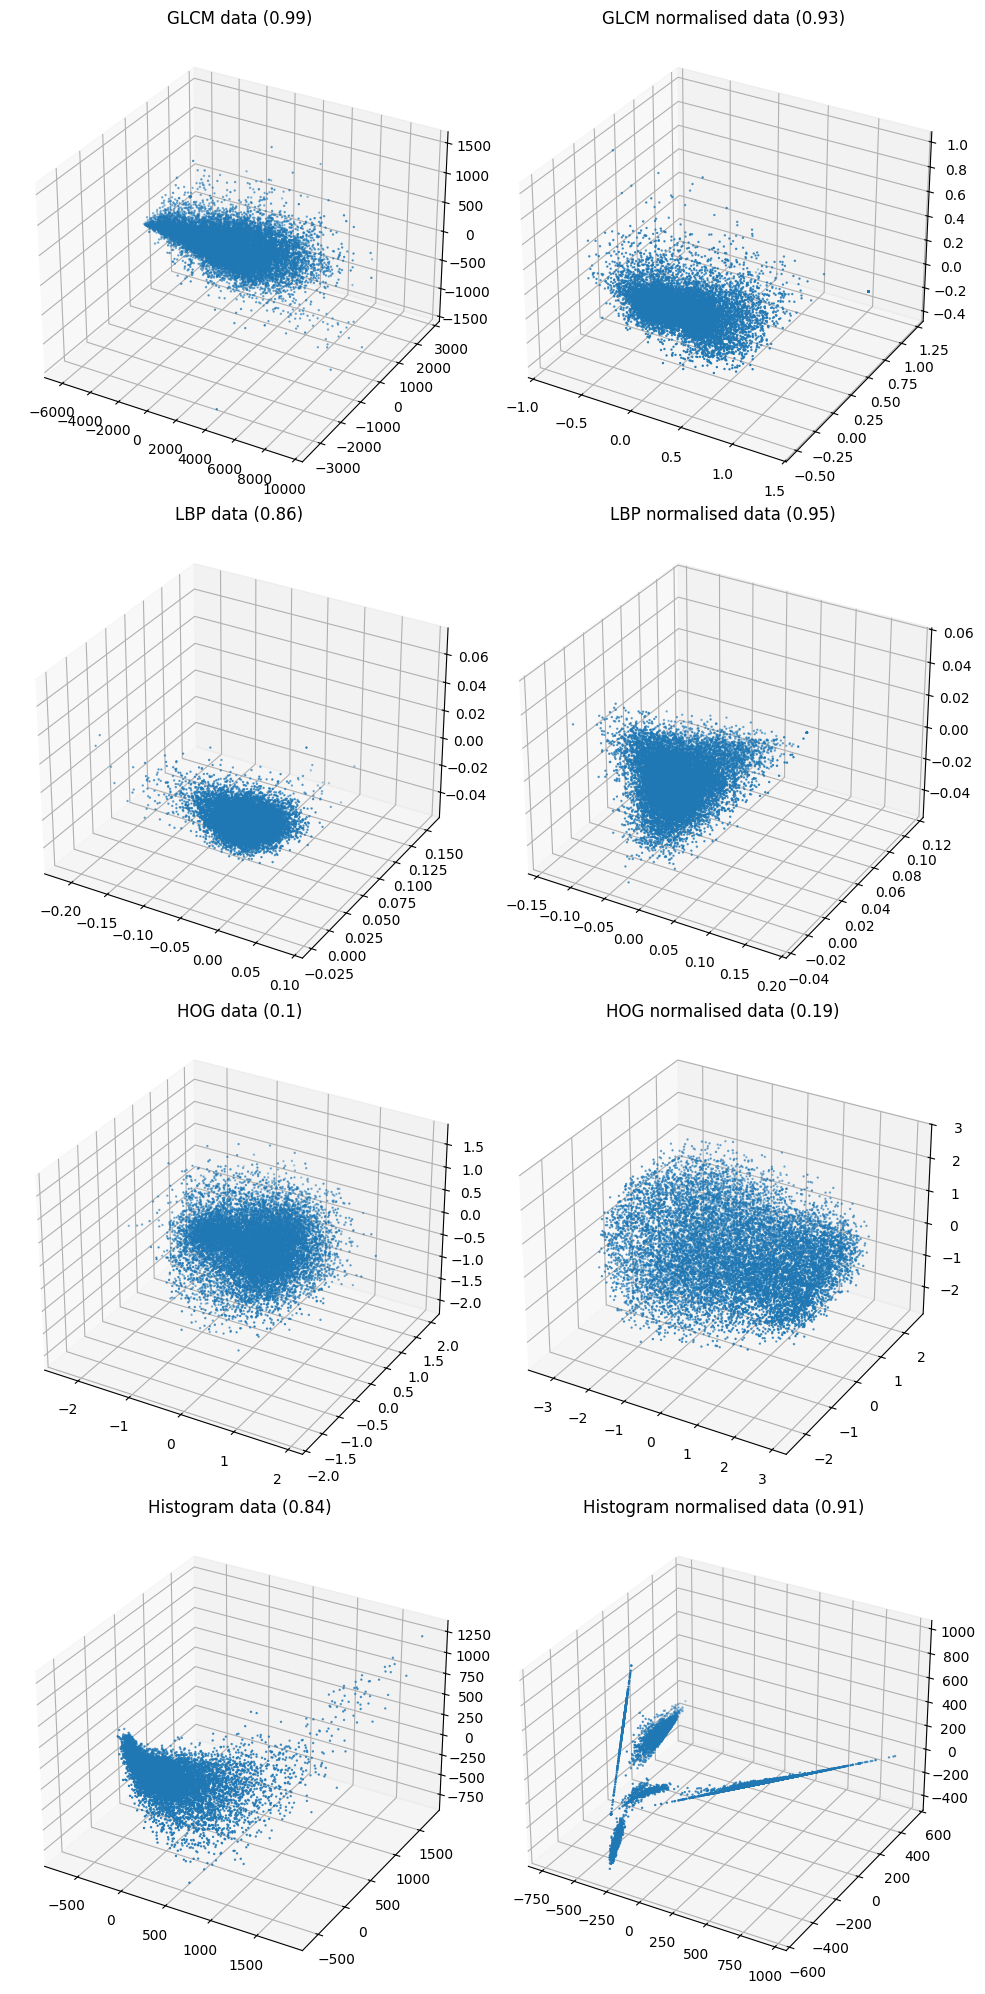

In [101]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure
fig = plt.figure(figsize=(10, 20))

n_rows = 4
n_cols = 2

x, y, z, ev = prepareData(glcm_data)
ax = fig.add_subplot(n_rows, n_cols, 1, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'GLCM data ({ev})')

x, y, z, ev = prepareData(glcm_data_n)
ax = fig.add_subplot(n_rows, n_cols, 2, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'GLCM normalised data ({ev})')

x, y, z, ev = prepareData(lbp_data)
ax = fig.add_subplot(n_rows, n_cols, 3, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'LBP data ({ev})')

x, y, z, ev = prepareData(lbp_data_n)
ax = fig.add_subplot(n_rows, n_cols, 4, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'LBP normalised data ({ev})')

x, y, z, ev = prepareData(hog_data)
ax = fig.add_subplot(n_rows, n_cols, 5, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'HOG data ({ev})')

x, y, z, ev = prepareData(hog_data_n)
ax = fig.add_subplot(n_rows, n_cols, 6, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'HOG normalised data ({ev})')

x, y, z, ev = prepareData(hist_data)
ax = fig.add_subplot(n_rows, n_cols, 7, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'Histogram data ({ev})')

x, y, z, ev = prepareData(hist_data_n)
ax = fig.add_subplot(n_rows, n_cols, 8, projection='3d')
ax.scatter(x, y, z, s=0.5)  # Example variation in z
ax.set_title(f'Histogram normalised data ({ev})')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:



# Define the number of plots
n_rows = 4
n_cols = 4

# Generate some sample data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z, ev = np.sin(np.sqrt(x**2 + y**2))

# Plotting the data
ax.scatter(x, y, z, 'o', color='blue', markersize=2, alpha=0.7, markeredgecolor='black')
# Create subplots
for i in range(n_rows):
    for j in range(n_cols):
        ax = fig.add_subplot(n_rows, n_cols, i * n_cols + j + 1, projection='3d')
        ax.scatter(x, y, z, s=0.5)  # Example variation in z
        ax.set_title(f'Subplot {i*n_cols + j + 1}')

# Adjust layout
plt.tight_layout()
plt.show()




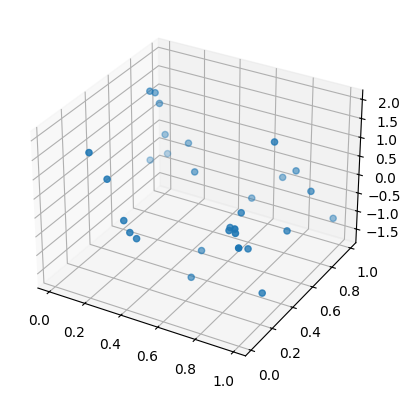

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample scattered data
x = np.random.rand(30)
y = np.random.rand(30)
z, ev = np.sin(x * 10) + np.cos(y * 10)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

plt.show()
